In [23]:
import pandas as pd
import numpy as np

churn = pd.read_csv("data/Churn.csv", true_values = ['yes', 'True.'], false_values = ['no','False.'])

In [24]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
churn.columns.values

array(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan",
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn?'], dtype=object)

In [26]:
churn['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [27]:
churn['Area Code'].unique()

array([415, 408, 510])

In [28]:
np.mean(churn['Churn?'])

0.14491449144914492

In [29]:
churn.drop('Phone', inplace = True, axis =1)

In [30]:
#Create dummies for State
churn = pd.concat([churn, pd.get_dummies(churn.State)], axis = 1)
churn.drop('KS', axis = 1, inplace = True)
churn.drop('State', axis = 1, inplace = True)

#Create dummies for Area Code
churn = pd.concat([churn, pd.get_dummies(churn['Area Code'])], axis = 1)
churn.drop(415, axis = 1, inplace = True)
churn.drop('Area Code', axis = 1, inplace = True)

In [31]:
churn.columns.values

array(['Account Length', "Int'l Plan", 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls',
       'Churn?', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE',
       'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 408, 510], dtype=object)

In [32]:
#Normalize and fill na values
y = churn.pop('Churn?')
y.fillna(-1, inplace  = True)
y = y.values
churn.fillna(-1, inplace = True)
X = churn.apply(lambda x: (x-np.mean(x)) / np.std(x))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
logclf = LogisticRegression()
logclf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
logclf.coef_[0]

array([  1.04692966e-02,   6.39177275e-01,  -8.70791974e-01,
         5.04611037e-01,   3.54318332e-01,   6.74680897e-02,
         3.55146217e-01,   1.84194832e-01,   3.34465014e-02,
         1.78937832e-01,   1.01477628e-01,  -3.59439490e-02,
         1.07125952e-01,   9.94499110e-02,  -2.18347681e-01,
         1.54684638e-01,   6.59935195e-01,  -1.09590561e-01,
        -1.23864380e-01,   8.20086865e-03,  -9.98485481e-02,
         1.05807385e-01,  -4.72256497e-02,  -1.01236035e-02,
        -1.43329246e-01,  -4.58129390e-02,  -1.24567059e-02,
        -6.60261145e-02,  -1.23844575e-01,  -5.37807397e-02,
        -3.03578070e-03,  -1.13370337e-01,  -1.44485313e-01,
        -2.62113369e-02,  -7.80198376e-02,   4.25845455e-02,
         1.39491873e-02,   4.81564526e-02,   7.45503406e-02,
         4.50045844e-02,  -5.89265013e-02,   1.72672647e-02,
         1.24697351e-01,  -1.99530138e-02,  -1.40055256e-01,
        -1.33784041e-01,   4.74141687e-03,   9.35657676e-02,
        -3.85826969e-02,

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
py.sign_in('scsherm', 'ml0wer7f1s')
from plotly.tools import FigureFactory as FF 

df = pd.DataFrame(churn.columns.values)
df['Beta_coefficients'] = np.exp(logclf.coef_[0])
df.rename(columns = {0:'Feature'}, inplace = True)

table_churn = FF.create_table(df)
py.iplot(table_churn, filename='coef_table_churn')

0.938109116335
Determining classes statistics... 2 classes detected: {False: 2280, True: 386}
Finding the 5 nearest neighbours...done!
Creating synthetic samples...Generated 386 new samples ...
done!
Determining classes statistics... 2 classes detected: {0.0: 2280, 1.0: 772}
Under-sampling performed: Counter({0.0: 772, 1.0: 772})
0.783505154639 0.880186290468 0.539007092199 0.701587611032


0.71064467766116945

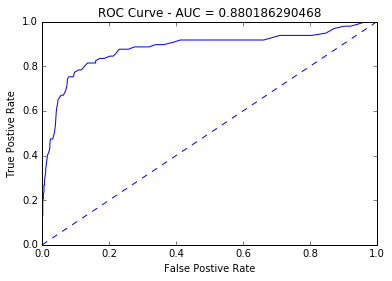

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score, StratifiedShuffleSplit, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import recall_score, precision_score, average_precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from unbalanced_dataset.over_sampling import SMOTE
from unbalanced_dataset.under_sampling import UnderSampler

clf = RandomForestClassifier(random_state=2, n_estimators=100, n_jobs = -1)
scores = cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 10)
score  = scores.mean()
print score


def run_rf_churn(X, y):
    
    X = X.values
    #Stratified split 80/20 train test
    sss = StratifiedShuffleSplit(y, n_iter = 1, test_size = 0.2, random_state = 42)
    for train_index, test_index in sss:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
    #Oversampling of unbalanced dataset
    sm = SMOTE(kind = 'regular', verbose = True)
    X_train, y_train = sm.fit_transform(X_train, y_train)
    #X_train, y_train = sm.fit_transform(X_train, y_train)
    
    u = UnderSampler()
    X_train, y_train = u.fit_transform(X_train, y_train)
    
    #Fit model
    clf = RandomForestClassifier(random_state=2, n_estimators = 100, n_jobs = -1)
    clf.fit(X_train, y_train)
    
    #Evaluate
    pred = clf.predict_proba(X_test)
    pred2 = clf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred[:,1])
    AUC = roc_auc_score(y_test, pred[:,1])
    AUC2 = average_precision_score(y_test, pred[:,1])
    recall = recall_score(y_test, pred2)
    precision = precision_score(y_test, pred2)
    v = np.linspace(0,1)
    plt.plot(v,v, linestyle = '--', color = 'b')
    plt.plot(fpr, tpr, label = 'Random Forest AUC = {}'.format(AUC))
    plt.xlabel("False Postive Rate")
    plt.ylabel("True Postive Rate")
    plt.title('ROC Curve - AUC = {}'.format(AUC)) 
    return recall, AUC, precision, AUC2, pred2, pred


recall, AUC, precision, AUC_precis_recall, pred2, pred = run_rf_churn(X,y)
np.mean(pred2 == y_test)

In [64]:
len(y_test)

667

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler


def prepare_data(filename):
    churn_df = pd.read_csv(filename)
    # Clean up categorical columns
    churn_df['Churn?'] = (churn_df['Churn?'] == 'True.').astype(int)
    yes_no_cols = ["Int'l Plan", "VMail Plan"]
    churn_df[yes_no_cols] = (churn_df[yes_no_cols] == "yes").astype(int)
    # set label array
    y = churn_df.pop('Churn?').values
    # Drop unwanted columns
    churn_df = churn_df.drop(['State', 'Area Code', 'Phone'], axis=1)
    # set feature matrix
    X = churn_df.values
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    # Scale data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test


def standard_confusion_matrix(y_true, y_predict):
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_predict)
    return np.array([[tp, fp], [fn, tn]])


def profit_curve(cost_benefit_matrix, probabilities, y_true):
    thresholds = sorted(probabilities)
    thresholds.append(1.0)
    profits = []
    for threshold in thresholds:
        y_predict = probabilities >= threshold
        confusion_mat = standard_confusion_matrix(y_true, y_predict)
        profit = np.sum(confusion_mat * cost_benefit_matrix) / float(len(y_true))
        profits.append(profit)
    return thresholds, profits


def run_profit_curve(model, costbenefit, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    probabilities = model.predict_proba(X_test)[:, 1]
    thresholds, profits = profit_curve(costbenefit, probabilities, y_test)
    return thresholds, profits


def plot_profit_models(models, costbenefit, X_train, X_test, y_train, y_test):
    percentages = np.linspace(0, 100, len(y_test) + 1)
    profit_dict = {}
    for model in models:
        thresholds, profits = run_profit_curve(model,
                                               costbenefit,
                                               X_train, X_test,
                                               y_train, y_test)
        profit_dict['thresholds'] = thresholds
        profit_dict[str(model)[:12]] = profits
        plt.plot(percentages, profits, label=model.__class__.__name__)
    plt.title("Profit Curves")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.legend(loc='upper left')
    plt.savefig('profit_curve.png')
    plt.show()
    return profit_dict


def find_best_threshold(models, costbenefit, X_train, X_test, y_train, y_test):
    max_model = None
    max_threshold = None
    max_profit = None
    for model in models:
        thresholds, profits = run_profit_curve(model, costbenefit,
                                               X_train, X_test,
                                               y_train, y_test)
        max_index = np.argmax(profits)
        if not max_model or profits[max_index] > max_profit:
            max_model = model.__class__.__name__
            max_threshold = thresholds[max_index]
            max_profit = profits[max_index]
    return max_model, max_threshold, max_profit


def toy_test():
    probas = np.array([0.2, 0.6, 0.4])
    labels = np.array([0, 0, 1])
    cb = np.array([[6, -3], [0, 0]])
    print profit_curve(cb, probas, labels)


def main():
    X_train, X_test, y_train, y_test = prepare_data('data/Churn.csv')
    costbenefit = np.array([[80, -10], [-70, 0]])
    models = [RF(), LR(), GBC(), SVC(probability=True)]
    profit_dict = plot_profit_models(models, costbenefit,
                       X_train, X_test, y_train, y_test)
    max_model, max_threshold, max_profit = find_best_threshold(models, costbenefit,
                              X_train, X_test, y_train, y_test)
    return max_model, max_threshold, max_profit, profit_dict

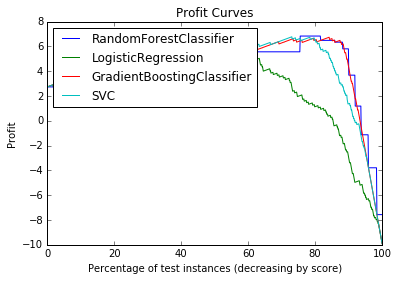

In [108]:
max_model, max_threshold, max_profit, profit_dict = main()

In [ ]:
with open('mycsvfile.csv', 'wb') as f:  
    w = csv.DictWriter(f, profit_dict.keys())
    w.writeheader()
    w.writerow(profit_dict)

In [112]:
import pandas as pd
a= pd.DataFrame.from_dict(profit_dict)

In [113]:
a

,GradientBoos,LogisticRegr,RandomForest,"SVC(C=1.0, c",thresholds
0,2.733813,2.733813,2.733813,2.733813,0.000814
1,2.745803,2.745803,2.733813,2.745803,0.000943
2,2.757794,2.757794,2.733813,2.757794,0.000957
3,2.769784,2.769784,2.733813,2.769784,0.001017
4,2.781775,2.781775,2.733813,2.781775,0.001141
5,2.793765,2.793765,2.733813,2.793765,0.001155
6,2.805755,2.805755,2.733813,2.805755,0.001166
7,2.817746,2.817746,2.733813,2.817746,0.001174
8,2.829736,2.829736,2.733813,2.829736,0.001275
9,2.841727,2.841727,2.733813,2.841727,0.001295
